Logistic Regression Model

## Data Cleaning and Setting up

In [ ]:
!pip install verstack

     |████████████████████████████████| 6.8 MB 3.4 MB/s 
     |████████████████████████████████| 23.2 MB 33.4 MB/s 
     |████████████████████████████████| 2.0 MB 13.3 MB/s 
     |████████████████████████████████| 308 kB 34.8 MB/s 
     |████████████████████████████████| 23.9 MB 11.4 MB/s 
     |████████████████████████████████| 80 kB 5.3 MB/s 
     |████████████████████████████████| 210 kB 4.7 MB/s 
     |████████████████████████████████| 75 kB 1.9 MB/s 
     |████████████████████████████████| 149 kB 36.4 MB/s 
     |████████████████████████████████| 112 kB 42.2 MB/s 
     |████████████████████████████████| 49 kB 2.6 MB/s 
  Created wheel for verstack: filename=verstack-1.1.12-py3-none-any.whl size=49123 sha256=f2c59f7dedc91779df79f2d2c819f952fd0d25cf1f343005bc66b7d97110d68b
  Stored in directory: /root/.cache/pip/wheels/0a/8d/52/631e08aaf7446a3622da2dd9a5b97859ff2ea83c41aeec6c5d
  Created wheel for pyperclip: filename=pyperclip-1.8.2-py3-none-any.whl size=11137 sha256=adb30e9789954ea

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("train.csv")

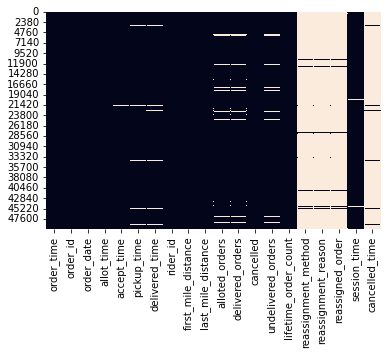

In [ ]:
sns.heatmap(df.isnull(), cbar=False)

In [ ]:
df = df.drop("reassignment_method", axis=1)
df = df.drop("reassignment_reason", axis=1)
df = df.drop("reassigned_order", axis=1)
df = df.drop("cancelled_time", axis=1)
df = df.drop("pickup_time", axis=1)
df = df.drop("delivered_time", axis=1)

In [ ]:
from datetime import datetime

def toDate(x):
    if x=="Missing_data" or len(x)!=19:
      return(datetime.strptime("2025-01-01 00:00:00", '%Y-%m-%d %H:%M:%S'))
    return datetime.strptime(x, '%Y-%m-%d %H:%M:%S')

In [ ]:
from verstack import NaNImputer
imputer = NaNImputer()
df1 = imputer.impute(df)

NaNImputer(conservative = False, n_feats = 10,            
           fix_string_nans = True, verbose = True,                
           multiprocessing_load = 3, fill_nans_in_pure_text = True,                    
           drop_empty_cols = True, drop_nan_cols_with_constant = True                        
           feature_selection = correlation)

Dataset dimensions:
 - rows:         49969
 - columns:      14
 - mb in memory: 5.34
 - NaN cols num: 10
--------------------------

Deploy multiprocessing with 2 parallel proceses

Missing values in accept_time replaced by "Missing_data" value
--------------------------------------------------
- rider_id:                      imputed 1 NaNs
- first_mile_distance:           imputed 1 NaNs
- alloted_orders:                imputed 1804 NaNs
- delivered_orders:              imputed 1849 NaNs
- last_mile_distance:            imputed 1 NaNs
- cancelled:                     imputed 1 NaNs
- lifetime_order_count:          imputed 12 NaNs
- sessio

In [ ]:
df["order_time"] = df["order_time"].apply(toDate)
df["order_date"] = df["order_date"].apply(toDate)
df["allot_time"] = df["allot_time"].apply(toDate)
df["accept_time"] = df["accept_time"].apply(toDate) 

In [ ]:
#Time difference between order and allot time
df["T1"] = (df["allot_time"] - df["order_time"])
df["T1"] = df["T1"].apply(lambda x: x.seconds)

In [ ]:
#Time difference between order and accept time
df["T2"] = (df["accept_time"] - df["order_time"])
df["T2"] = df["T2"].apply(lambda x: x.seconds)
df['T2'] = np.where(df['accept_time']==(datetime.strptime("2025-01-01 00:00:00", '%Y-%m-%d %H:%M:%S')), -1, 
                    df['T2'])

In [ ]:
#Time difference between allot and accept time
df["T3"] = (df["accept_time"] - df["allot_time"])
df["T3"] = df["T3"].apply(lambda x: x.seconds)
df['T3'] = np.where(df['accept_time']==(datetime.strptime("2025-01-01 00:00:00", '%Y-%m-%d %H:%M:%S')), -1, 
                    df['T3'])

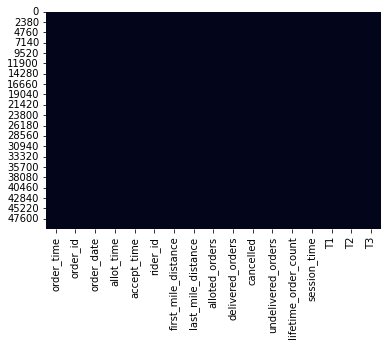

In [ ]:
sns.heatmap(df.isnull(), cbar=False)

In [ ]:
df3 = df

In [ ]:
df3

,order_time,order_id,order_date,allot_time,accept_time,rider_id,first_mile_distance,last_mile_distance,alloted_orders,delivered_orders,cancelled,undelivered_orders,lifetime_order_count,session_time,T1,T2,T3
0,2021-01-26 02:21:35,556753,2021-01-26,2021-01-26 02:21:59,2021-01-26 02:22:08,11696.00,1.566600,2.650000,46.0,46.0,0.0,0.0,621.0,0.500000,24,33,9
1,2021-01-26 02:33:16,556754,2021-01-26,2021-01-26 02:33:57,2021-01-26 02:34:45,18117.00,2.520700,2.760000,8.0,8.0,0.0,0.0,105.0,3.266667,41,89,48
2,2021-01-26 02:39:49,556755,2021-01-26,2021-01-26 02:39:57,2021-01-26 02:40:13,18623.00,2.207400,4.800000,1.0,1.0,0.0,0.0,66.0,9.816667,8,24,16
3,2021-01-26 02:47:53,556756,2021-01-26,2021-01-26 02:48:25,2021-01-26 02:49:06,15945.00,2.189400,6.380000,1.0,1.0,0.0,0.0,127.0,17.533333,32,73,41
4,2021-01-26 03:06:30,556757,2021-01-26,2021-01-26 03:07:21,2021-01-26 03:07:57,17589.00,2.787000,4.010000,34.0,34.0,0.0,0.0,84.0,1.350000,51,87,36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49964,2021-01-27 13:30:26,529612,2021-01-27,2021-01-27 13:30:28,2021-01-27 13:30:46,7241.00,2.033100,5.210000,132.0,131.0,0.0,1.0,845.0,0.433333,2,20,18
49965,2021-01-27 13:30:27,529613,2021-01-27,2021-01-27 13:31:02,2021-01-27 13:32:12,19022.00,2.178500,2.920000,16.0,16.0,0.0,0.0,430.0,0.450000,35,105,70
49966,2021-01-27 13:30:27,529614,2021-01-27,2021-01-27 13:31:10,2021-01-27 13:31:52,190.00,0.669800,4.000000,545.0,540.0,0.0,5.0,1297.0,422.600000,43,85,42
49967,2021-01-27 13:30:27,529615,2021-01-27,2021-01-27 13:30:28,2021-01-27 13:30:37,4014.00,1.676700,2.710000,142.0,141.0,0.0,1.0,668.0,0.616667,1,10,9


In [ ]:
df3 = df3.drop("order_time", axis=1)
df3 = df3.drop("order_date", axis=1)
df3 = df3.drop("accept_time", axis=1)
df3 = df3.drop("allot_time", axis=1)

In [ ]:
df3

,order_id,rider_id,first_mile_distance,last_mile_distance,alloted_orders,delivered_orders,cancelled,undelivered_orders,lifetime_order_count,session_time,T1,T2,T3
0,556753,11696.00,1.566600,2.650000,46.0,46.0,0.0,0.0,621.0,0.500000,24,33,9
1,556754,18117.00,2.520700,2.760000,8.0,8.0,0.0,0.0,105.0,3.266667,41,89,48
2,556755,18623.00,2.207400,4.800000,1.0,1.0,0.0,0.0,66.0,9.816667,8,24,16
3,556756,15945.00,2.189400,6.380000,1.0,1.0,0.0,0.0,127.0,17.533333,32,73,41
4,556757,17589.00,2.787000,4.010000,34.0,34.0,0.0,0.0,84.0,1.350000,51,87,36
...,...,...,...,...,...,...,...,...,...,...,...,...,...
49964,529612,7241.00,2.033100,5.210000,132.0,131.0,0.0,1.0,845.0,0.433333,2,20,18
49965,529613,19022.00,2.178500,2.920000,16.0,16.0,0.0,0.0,430.0,0.450000,35,105,70
49966,529614,190.00,0.669800,4.000000,545.0,540.0,0.0,5.0,1297.0,422.600000,43,85,42
49967,529615,4014.00,1.676700,2.710000,142.0,141.0,0.0,1.0,668.0,0.616667,1,10,9


In [ ]:
!pip install XGBOOST

## Model

In [ ]:
from numpy import loadtxt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
X = df3.drop("cancelled", axis=1)
Y = df3['cancelled']

In [ ]:
seed = 7
test_size = 0.33
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)

In [ ]:
# fit model to training data
model = LogisticRegression()
model.fit(X_train, y_train)

Accuracy: 98.96%
Accuracy: 98.96%
Accuracy: 98.96%
Accuracy: 98.96%
Accuracy: 98.96%


In [ ]:
print(model)

LogisticRegression()


In [ ]:
# make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]

In [ ]:
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 98.96%


In [ ]:
from sklearn import metrics
y_pred_p = model.predict_proba(X_test)[::,1]

auc = metrics.roc_auc_score(y_test, y_pred_p)
print(auc)

0.7040709522599301


In [ ]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_pred, y_test)
cm

array([[16316,   166],
       [    5,     3]])

## Test Data

In [ ]:
df4 = pd.read_csv("test.csv")

In [ ]:
df4.shape

(144844, 16)

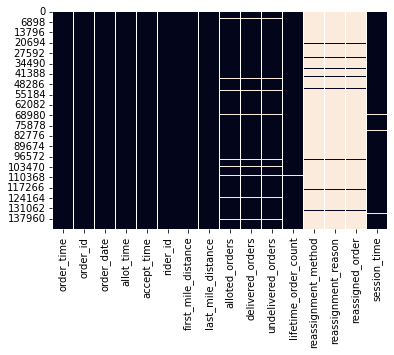

In [ ]:
sns.heatmap(df4.isnull(), cbar=False)

In [ ]:
df4 = df4.drop("reassignment_method", axis=1)
df4 = df4.drop("reassignment_reason", axis=1)
df4 = df4.drop("reassigned_order", axis=1)

In [ ]:
from datetime import datetime

def toDate(x):
    if x=="Missing_data" or len(x)!=19:
      return(datetime.strptime("2025-01-01 00:00:00", '%Y-%m-%d %H:%M:%S'))
    return datetime.strptime(x, '%Y-%m-%d %H:%M:%S')

In [ ]:
from verstack import NaNImputer
imputer = NaNImputer()
df0 = imputer.impute(df4)

NaNImputer(conservative = False, n_feats = 10,            
           fix_string_nans = True, verbose = True,                
           multiprocessing_load = 3, fill_nans_in_pure_text = True,                    
           drop_empty_cols = True, drop_nan_cols_with_constant = True                        
           feature_selection = correlation)

Dataset dimensions:
 - rows:         144844
 - columns:      13
 - mb in memory: 14.37
 - NaN cols num: 6
--------------------------

Deploy multiprocessing with 2 parallel proceses

Missing values in accept_time replaced by "Missing_data" value
--------------------------------------------------
- delivered_orders:              imputed 4884 NaNs
- alloted_orders:                imputed 4773 NaNs
- lifetime_order_count:          imputed 778 NaNs
- session_time:                  imputed 5054 NaNs
- undelivered_orders:            imputed 4884 NaNs

NaNs imputation time: 0.73 minutes
--------------------------------------------------


In [ ]:
df4["session_time"] = df4["session_time"].fillna(236)

In [ ]:
df4["alloted_orders"] = df4["alloted_orders"].fillna(5)
df4["delivered_orders"] = df4["delivered_orders"].fillna(5)
df4["undelivered_orders"] = df4["undelivered_orders"].fillna(5)

In [ ]:
df4["order_time"] = df4["order_time"].apply(toDate)
df4["order_date"] = df4["order_date"].apply(toDate)
df4["allot_time"] = df4["allot_time"].apply(toDate)

In [ ]:
df4["accept_time"] = df4["accept_time"].apply(toDate) 

In [ ]:
#Time difference between order and allot time
df4["T1"] = (df4["allot_time"] - df4["order_time"])
df4["T1"] = df4["T1"].apply(lambda x: x.seconds)

In [ ]:
#Time difference between order and accept time
df4["T2"] = (df4["accept_time"] - df4["order_time"])
df4["T2"] = df4["T2"].apply(lambda x: x.seconds)
df4['T2'] = np.where(df4['accept_time']==(datetime.strptime("2025-01-01 00:00:00", '%Y-%m-%d %H:%M:%S')), -1, 
                    df4['T2'])

In [ ]:
#Time difference between allot and accept time
df4["T3"] = (df4["accept_time"] - df4["allot_time"])
df4["T3"] = df4["T3"].apply(lambda x: x.seconds)
df4['T3'] = np.where(df4['accept_time']==(datetime.strptime("2025-01-01 00:00:00", '%Y-%m-%d %H:%M:%S')), -1, 
                    df4['T3'])

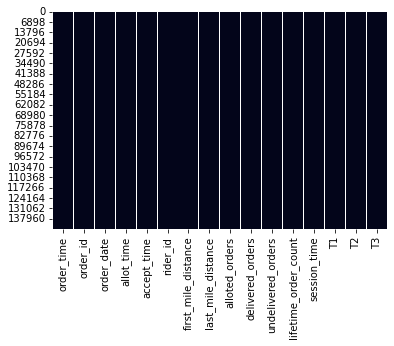

In [ ]:
sns.heatmap(df4.isnull(), cbar=False)

In [ ]:
df5 = df4

In [ ]:
df5

,order_time,order_id,order_date,allot_time,accept_time,rider_id,first_mile_distance,last_mile_distance,alloted_orders,delivered_orders,undelivered_orders,lifetime_order_count,session_time,T1,T2,T3
0,2021-02-06 10:03:24,130231,2021-02-06,2021-02-06 10:03:49,2021-02-06 10:04:15,12884,1.658500,4.54,216.0,215.0,1.0,747.0,273.400000,25,51,26
1,2021-02-06 10:03:26,130232,2021-02-06,2021-02-06 10:03:27,2021-02-06 10:03:36,3541,2.070900,5.84,52.0,52.0,0.0,75.0,252.100000,1,10,9
2,2021-02-06 10:03:27,130233,2021-02-06,2021-02-06 10:04:14,2021-02-06 10:05:34,603,1.388400,0.99,289.0,289.0,0.0,2214.0,241.383333,47,127,80
3,2021-02-06 10:03:29,130234,2021-02-06,2021-02-06 10:03:30,2021-02-06 10:03:53,3414,1.903900,2.59,125.0,122.0,3.0,1020.0,291.933333,1,24,23
4,2021-02-06 10:03:35,130235,2021-02-06,2021-02-06 10:03:43,2021-02-06 10:04:43,1426,0.827500,0.94,352.0,350.0,2.0,7284.0,247.133333,8,68,60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144839,2021-02-09 20:13:39,41184,2021-02-09,2021-02-09 20:13:40,2021-02-09 20:13:49,7141,1.417000,3.96,52.0,52.0,0.0,413.0,179.266667,1,10,9
144840,2021-02-09 20:21:36,41185,2021-02-09,2021-02-09 20:21:59,2021-02-09 20:22:33,8113,0.775600,1.61,95.0,93.0,2.0,284.0,244.400000,23,57,34
144841,2021-02-09 20:24:25,41186,2021-02-09,2021-02-09 20:25:03,2021-02-09 20:26:10,5040,2.049400,1.26,77.0,77.0,0.0,119.0,259.000000,38,105,67
144842,2021-02-09 20:28:07,41187,2021-02-09,2021-02-09 20:28:29,2021-02-09 20:28:53,2946,0.080494,5.50,231.0,228.0,3.0,1759.0,814.283333,22,46,24


In [ ]:
df5 = df5.drop("order_time", axis=1)
df5 = df5.drop("order_date", axis=1)
df5 = df5.drop("accept_time", axis=1)
df5 = df5.drop("allot_time", axis=1)

In [ ]:
df5

,order_id,rider_id,first_mile_distance,last_mile_distance,alloted_orders,delivered_orders,undelivered_orders,lifetime_order_count,session_time,T1,T2,T3
0,130231,12884,1.658500,4.54,216.0,215.0,1.0,747.0,273.400000,25,51,26
1,130232,3541,2.070900,5.84,52.0,52.0,0.0,75.0,252.100000,1,10,9
2,130233,603,1.388400,0.99,289.0,289.0,0.0,2214.0,241.383333,47,127,80
3,130234,3414,1.903900,2.59,125.0,122.0,3.0,1020.0,291.933333,1,24,23
4,130235,1426,0.827500,0.94,352.0,350.0,2.0,7284.0,247.133333,8,68,60
...,...,...,...,...,...,...,...,...,...,...,...,...
144839,41184,7141,1.417000,3.96,52.0,52.0,0.0,413.0,179.266667,1,10,9
144840,41185,8113,0.775600,1.61,95.0,93.0,2.0,284.0,244.400000,23,57,34
144841,41186,5040,2.049400,1.26,77.0,77.0,0.0,119.0,259.000000,38,105,67
144842,41187,2946,0.080494,5.50,231.0,228.0,3.0,1759.0,814.283333,22,46,24


# Predictions

In [ ]:
Y = df5

In [ ]:
# make predictions for test data
y_pred = model.predict(Y)
predictions = [round(value) for value in y_pred]
print(y_pred)

[0. 0. 0. ... 0. 0. 1.]


In [ ]:
frame = { 'order_id': df5['order_id'], 'cancelled': y_pred}
result = pd.DataFrame(frame)
result.head(5)

,order_id,cancelled
0,130231,0.0
1,130232,0.0
2,130233,0.0
3,130234,0.0
4,130235,0.0


In [ ]:
result.to_csv("submission1.csv")

In [ ]:
result[result.cancelled==1]

,order_id,cancelled
11,130242,1.0
40,130271,1.0
84,130315,1.0
176,130407,1.0
288,130519,1.0
...,...,...
144793,41138,1.0
144818,41163,1.0
144822,41167,1.0
144827,41172,1.0


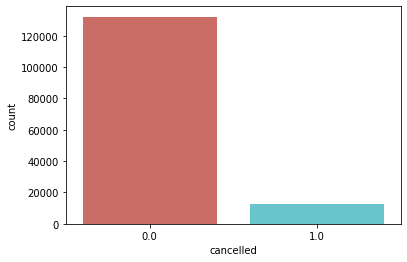

In [ ]:
sns.countplot(x='cancelled', data=result, palette='hls')
plt.show()